In [1]:
import pandas as pd

In [2]:
medium=pd.read_csv('C:\\Users\\mihir\\Desktop\\IST736\\articles.csv')

In [3]:
medium.head()

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...


In [4]:
medium['author'].value_counts()

Adam Geitgey                   16
Arthur Juliani                 10
Slav Ivanov                    10
Milo Spencer-Harper             8
Dhruv Parthasarathy             6
Netflix Technology Blog         5
Andrej Karpathy                 5
Stefan Kojouharov               5
Sarthak Jain                    5
Justin Lee                      4
Emmanuel Ameisen                4
Max Pechyonkin                  4
Gil Fewster                     4
David Venturi                   4
Greg Fish                       4
Eugenio Culurciello             4
Vishal Maini                    4
Blaise Aguera y Arcas           4
Abhishek Parbhakar              4
Irhum Shafkat                   3
Datafiniti                      3
Sebastian Heinz                 3
Tim Anglade                     3
Aman Dalmia                     3
Conor Dewey                     3
Gant Laborde                    3
Per Harald Borgen               3
Michael Jordan                  3
Dr. GP Pulipaka                 3
Arvind N      

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [9]:
#get all articles in a list
medium_articles=medium['text'].values.tolist()

In [7]:
len(medium_articles)

337

In [11]:
import re
cleaned=[re.sub("\d+", "",i) for i in medium_articles]

In [14]:
#lemmatization https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
from nltk.corpus import wordnet
import nltk
from nltk.stem import WordNetLemmatizer 

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
lemmatizer = WordNetLemmatizer()

cleaned1=[]
for i in cleaned:
    lemma=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(i)]
    lemma=' '.join(lemma)
    cleaned1.append(lemma)
    del(lemma)

In [8]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=0.03,max_features=5000, stop_words='english')

In [15]:
tf = tf_vectorizer.fit_transform(cleaned1)
tf_feature_names = tf_vectorizer.get_feature_names()

In [16]:
tf_feature_names

['ability',
 'able',
 'absolute',
 'absolutely',
 'abstract',
 'abstraction',
 'ac',
 'academia',
 'academic',
 'accelerate',
 'acceleration',
 'accept',
 'access',
 'accessible',
 'accomplish',
 'accord',
 'according',
 'accordingly',
 'account',
 'accumulate',
 'accuracy',
 'accurate',
 'accurately',
 'achieve',
 'achievement',
 'achieves',
 'acquire',
 'act',
 'action',
 'activate',
 'activation',
 'active',
 'activity',
 'actor',
 'actual',
 'actually',
 'ad',
 'adam',
 'adapt',
 'adaptive',
 'add',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'adjust',
 'adjustment',
 'adoption',
 'advance',
 'advanced',
 'advancement',
 'advantage',
 'advent',
 'adversarial',
 'advertising',
 'advice',
 'advise',
 'affect',
 'affiliate',
 'afternoon',
 'age',
 'ageitgey',
 'agent',
 'ago',
 'agree',
 'ahead',
 'ai',
 'aid',
 'aim',
 'air',
 'ais',
 'al',
 'albeit',
 'alert',
 'alex',
 'alexnet',
 'algebra',
 'algorithm',
 'algorithmic',
 'align',
 'alike',
 'allow',
 'allo

In [14]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 20

# Run NMF
#nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(tf)

Text(0.5, 1.0, 'Number of topics V/s Perplexity')

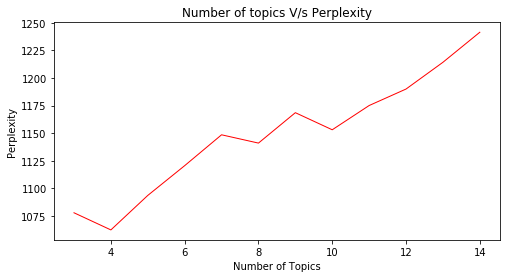

In [18]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topic = []
perplexity_ = []
topics_min = 3
topics_max = 15
for i in range(topics_min,topics_max,1):
    lda = LatentDirichletAllocation(n_components=i, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)       
    lda_z = lda.fit_transform(tf)
    no_topic.append(i)
    perplexity_.append(lda.perplexity(tf))
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,4))
plt.plot(no_topic,perplexity_,color="red",linewidth=1)
plt.xlabel('Number of Topics')
plt.ylabel("Perplexity")
plt.title("Number of topics V/s Perplexity")


In [21]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10

In [23]:
lda = LatentDirichletAllocation(n_components=4, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(tf)

In [25]:
display_topics(lda, tf_feature_names, no_top_words=20)

Topic 0:
network use data image model neural learn layer training like input function make time output work machine example weight just
Topic 1:
use model gtx card time woman data gpus ti work gpu cpu attract run image like great face learn network
Topic 2:
machine data human learn use ai like make people intelligence course new computer time technology work way need company just
Topic 3:
learn network use deep neural make learning action like ai time say just work game way state value policy algorithm


In [26]:
def topic_model(coll,max_feat=1000,no_topics=20,no_top_words=10):
    '''Coll is the list of docs
    max_feat is the maximum features for vectorization
    no_topics is the number of topics to be modelled
    no_top_words is the number of words to be displayed in each topic'''
    tf_vectorizer = CountVectorizer(max_df=0.95, min_df=0.03,max_features=max_feat, stop_words='english')
    tf = tf_vectorizer.fit_transform(coll)    
    lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
    lda_z = lda.fit_transform(tf)
    topics=display_topics(lda, tf_feature_names, no_top_words)
    return topics
    

In [28]:
#for titles
medium_titles=medium['title'].values.tolist()

In [32]:
topic_model(medium_titles,max_feat=200,no_topics=10)

Topic 0:
ability accelerate absolute accordingly accessible account accept acceleration accomplish ac
Topic 1:
access ac accept able acceleration absolute accessible account accordingly according
Topic 2:
academia ability academic abstraction abstract accessible acceleration accord accordingly absolute
Topic 3:
absolutely accord ability academia abstract academic accessible access accelerate accept
Topic 4:
academia accessible abstraction academic abstract accord absolutely account ability absolute
Topic 5:
access according acceleration accord absolute accessible ability abstract absolutely accept
Topic 6:
ability ac able acceleration accelerate accessible academia abstract accord accomplish
Topic 7:
academia academic accelerate abstract abstraction accept access ability absolutely ac
Topic 8:
accelerate academia abstract accordingly accomplish according accept account access ability
Topic 9:
academic academia accelerate abstraction ac account ability accessible acceleration accept


In [22]:
#for authors 
adamg=medium[medium['author']=='Adam Geitgey']['text'].values.tolist()

In [24]:
topic_model(adamg,max_feat=1000,no_topics=10)

Topic 0:
month meaning sure limited likely life function home identify particular
Topic 1:
identify friends network improve month questions students represents weights art
Topic 2:
turns identify sentences email network predicted image friends set sound
Topic 3:
network improve month include questions read set transfer life good
Topic 4:
architecture blog facebook map network different reviews left students members
Topic 5:
turns sentences service trying effect layer target work separate driven
Topic 6:
weights identify expect predicted high know students working reward reduce
Topic 7:
expect improve students experiment methods questions network include conversations rate
Topic 8:
network improve include worked turns good month expect read deeper
Topic 9:
speech identify starting rate basic network highly friends weights website


In [7]:
#wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


In [6]:
def wordcloud(coll):
    collapsed_string=(" ").join(coll)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(collapsed_string)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

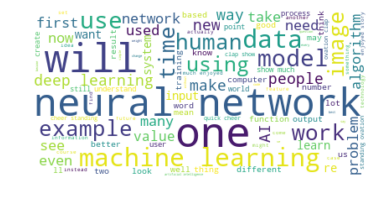

In [10]:
#Worcloud for all articles text
wordcloud(medium_articles)

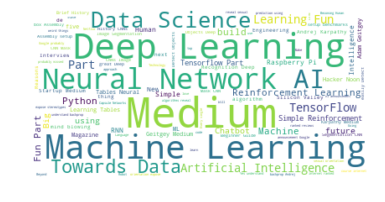

In [89]:
#Worcloud for all articles title
wordcloud(medium_titles)

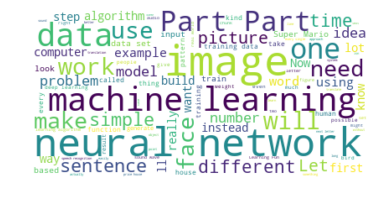

In [66]:
#text wordcloud for adam
wordcloud(adamg)

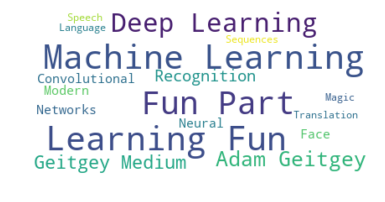

In [67]:
#title wordcloud for adam
wordcloud(medium[medium['author']=='Adam Geitgey']['title'].values.tolist())

In [68]:
#arthur juliani


In [78]:
#topic modelling text 
topic_model(medium[medium['author']=='Arthur Juliani']['text'].values.tolist(),max_feat=1000,no_topics=5)

Topic 0:
hand engineering completely making idea driven access cases lanes bring
Topic 1:
known current feed concept actual aren keras actually driving larger
Topic 2:
2016 action math cloud actual decades intelligence focus increase free
Topic 3:
changes known bring channel correct complexity internet faster la believe
Topic 4:
humans file known hand feel friends lines driving highly chatbots


In [29]:
#topic modelling title
topic_model(medium[medium['author']=='Arthur Juliani']['title'].values.tolist(),max_feat=1000,no_topics=10)

Topic 0:
100 000 2015 2017 2016 20 10 16 1080
Topic 1:
20 2016 10 2017 16 000 100 2015 1080
Topic 2:
100 1080 2016 2015 000 16 20 2017 10
Topic 3:
16 100 1080 000 10 2015 20 2016 2017
Topic 4:
100 10 16 1080 000 2016 2015 20 2017
Topic 5:
2015 2017 1080 2016 000 10 16 20 100
Topic 6:
2015 2016 2017 1080 10 000 16 20 100
Topic 7:
2015 2017 2016 20 100 000 10 1080 16
Topic 8:
1080 2016 10 16 2015 100 000 2017 20
Topic 9:
2017 100 000 10 1080 2015 2016 16 20


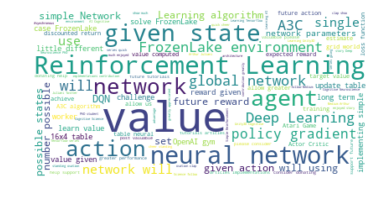

In [81]:
#wordcloud arthur text
wordcloud(medium[medium['author']=='Arthur Juliani']['text'].values.tolist())

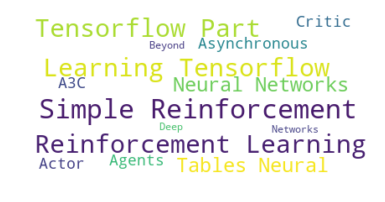

In [82]:
#wordcloud arthur title
wordcloud(medium[medium['author']=='Arthur Juliani']['title'].values.tolist())

In [ ]:
#Slav Ivanov


In [26]:
#topic modelling
print("Topic Modelling Text:")
print(" ")
topic_model(medium[medium['author']=='Slav Ivanov']['text'].values.tolist(),max_feat=1000,no_topics=5)
print("Topic Modelling Title:")
print(" ")
topic_model(medium[medium['author']=='Slav Ivanov']['title'].values.tolist(),max_feat=1000,no_topics=5)

Topic Modelling Text:
 
Topic 0:
known mean table complicated list looking require save interests worth
Topic 1:
described known times mean table http complicated require looking 2015
Topic 2:
http 2015 described times higher high hours little english box
Topic 3:
2015 higher times described range little http english domain leading
Topic 4:
http times 2015 design tensorflow high box languages startups took
Topic Modelling Title:
 
Topic 0:
100 000 2017 20 abstract 2016 16 1080 access 50
Topic 1:
000 10 16 20 according abstract access ability 30 2017
Topic 2:
2015 access 20 2017 ability abstract 2016 50 10 000
Topic 3:
able 1080 000 30 abstract according 20 2016 16 10
Topic 4:
10 according 30 able access 50 2016 20 000 100


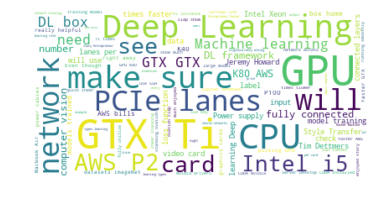

In [85]:
#worcloud text slav
wordcloud(medium[medium['author']=='Slav Ivanov']['text'].values.tolist())

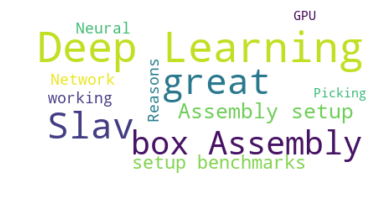

In [86]:
#worcloud title slav
wordcloud(medium[medium['author']=='Slav Ivanov']['title'].values.tolist())

In [4]:
#claps prediction
#convert K into thousands
claps=medium['claps']

In [6]:
claps=[float(x.replace('k', '')) * 1000 for x in claps if float(x) > 1000]

ValueError: could not convert string to float: '8.3K'